In [1]:
from src.experiment import ExperimentInstance
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import tensorflow as tf
import random

In [2]:
def plot_best_worst(dataset, true, preds, dates):
    preds = preds.reshape(-1, 24)
    true = true.reshape(-1, 24)
    mse_reshaped = np.sqrt(((true-preds)**2).mean(axis=1))
    min_index = np.argmin(mse_reshaped)
    best_dates = dates[min_index*24: min_index*24+24]
    best_preds = preds[min_index]
    best_trues = true[min_index]

    max_index = np.argmax(mse_reshaped)

    worst_dates = dates[max_index*24: max_index*24+24]
    worst_preds = preds[max_index]
    worst_trues = true[max_index]

    sns.set(style='white', font_scale=2.4)
    fig, ax = plt.subplots(2, 1, figsize=(20,10))
    sns.lineplot(x=best_dates, y=best_preds, ax=ax[0], label='Prediction', marker='o')
    sns.lineplot(x=best_dates, y=best_trues, ax=ax[0], label='True', marker='o')
    ax[0].xaxis.grid() # vertical lines
    ax[0].set_title(f'Best prediction ({round(mse_reshaped[min_index], 2)} RMSE)')
    ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds > best_trues), color='C0', alpha=0.2, interpolate=True)
    ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds <= best_trues), color='C1', alpha=0.2, interpolate=True)


    sns.lineplot(x=worst_dates, y=worst_preds, ax=ax[1], label='Prediction', marker='o')
    sns.lineplot(x=worst_dates, y=worst_trues, ax=ax[1], label='True', marker='o')
    ax[1].xaxis.grid() # vertical lines
    ax[1].set_title(f'Worst prediction ({round(mse_reshaped[max_index], 2)} RMSE)')
    ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds <= worst_trues), color='C1', alpha=0.2, interpolate=True)
    ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds > worst_trues), color='C0', alpha=0.2, interpolate=True)


    date_form = DateFormatter("%d %b %H:00")
    ax[0].xaxis.set_major_formatter(date_form)

    ax[1].xaxis.set_major_formatter(date_form)


    for label in ax[0].get_xticklabels():
        label.set_ha("center")
        label.set_rotation(25)

    for label in ax[1].get_xticklabels():
        label.set_ha("center")
        label.set_rotation(25)

    plt.tight_layout()

    fig.savefig(f"figures/BestWorst/BestWorst{dataset.capitalize()}TSL.png", bbox_inches='tight')

def plot_heatmap(dataset, true, preds, dates):
    mse = (true-preds)**2
    results = pd.DataFrame({'Month': dates.month, 'Hour': dates.hour, 'Error': mse}).iloc[:-1].groupby(['Month', 'Hour']).mean().reset_index()
    heatmap = results.pivot("Hour", "Month", "Error").apply(np.sqrt)

    sns.set(font_scale=3)
    plt.subplots(figsize=(20,20))
    g = sns.heatmap(heatmap, annot=True, cmap="crest", fmt=".1f", cbar=False)
    fig = g.get_figure()
    fig.savefig(f"figures/ErrorMaps/{dataset.capitalize()}TSL.png", bbox_inches='tight')

In [3]:
parameters = {"aljarafe": {'dataset': {'name': "aljarafe0523", 
                          'params': {'seq_len': 65, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 
              'selection': {'name': 'TimeSelectionLayer', 
                            'params': {'regularization': 0.0038786676545773, 'residual': False}}, 
              'model': {'name': 'lstm', 
                        'params': {'keep_dims': False, 'layers': 1, 'units': 48, 'dropout': 0.4003163363403081, 'batch_size': 18, 'lr': 0.0080903414366259, 'type': 'tensorflow'}}},

             "asomadilla": {'dataset': {'name': "asomadilla0523", 
                          'params': {'seq_len': 71, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 
              'selection': {'name': 'TimeSelectionLayer', 
                            'params': {'regularization': 0.0075014681350181, 'residual': False}}, 
              'model': {'name': 'lstm', 
                        'params': {'keep_dims': False, 'layers': 2, 'units': 48, 'dropout': 0.3719129270375464, 'batch_size': 44, 'lr': 0.0002810539457074, 'type': 'tensorflow'}}},
             
             "bermejales": {'dataset': {'name': "bermejales0523", 
                          'params': {'seq_len': 65, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 
              'selection': {'name': 'TimeSelectionLayer', 
                            'params': {'regularization': 0.0024621860549236, 'residual': False}}, 
              'model': {'name': 'lstm', 
                        'params': {'keep_dims': False, 'layers': 1, 'units': 36, 'dropout': 0.0099400669198977, 'batch_size': 29, 'lr': 0.0003802342314058, 'type': 'tensorflow'}}},
             
             "rondadelvalle": {'dataset': {'name': "rondadelvalle0523", 
                          'params': {'seq_len': 71, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 
              'selection': {'name': 'TimeSelectionLayer', 
                            'params': {'regularization': 0.0075014681350181, 'residual': False}}, 
              'model': {'name': 'lstm', 
                        'params': {'keep_dims': False, 'layers': 2, 'units': 48, 'dropout': 0.3432504638407918, 'batch_size': 51, 'lr': 0.0002810539457074, 'type': 'tensorflow'}}},
            
            "torneo": {'dataset': {'name': "torneo0523", 
                          'params': {'seq_len': 71, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 
              'selection': {'name': 'TimeSelectionLayer', 
                            'params': {'regularization': 0.0075014681350181, 'residual': False}}, 
              'model': {'name': 'lstm', 
                        'params': {'keep_dims': False, 'layers': 2, 'units': 48, 'dropout': 0.3432504638407918, 'batch_size': 51, 'lr': 0.0002810539457074, 'type': 'tensorflow'}}},

            }

{'dataset': {'name': 'aljarafe0523', 'params': {'seq_len': 65, 'pred_len': 24, 'shift': 24, 'crossval': False, 'test_year': 2023}}, 'selection': {'name': 'TimeSelectionLayer', 'params': {'regularization': 0.0038786676545773, 'residual': False}}, 'model': {'name': 'lstm', 'params': {'keep_dims': False, 'layers': 1, 'units': 48, 'dropout': 0.4003163363403081, 'batch_size': 18, 'lr': 0.0080903414366259, 'type': 'tensorflow'}}}
12/12 [==============================] - 0s 3ms/step
{'dataset': {'name': 'asomadilla0523', 'params': {'seq_len': 71, 'pred_len': 24, 'shift': 24, 'crossval': False}}, 'selection': {'name': 'TimeSelectionLayer', 'params': {'regularization': 0.0075014681350181, 'residual': False}}, 'model': {'name': 'lstm', 'params': {'keep_dims': False, 'layers': 2, 'units': 48, 'dropout': 0.3719129270375464, 'batch_size': 44, 'lr': 0.0002810539457074, 'type': 'tensorflow'}}}
12/12 [==============================] - 0s 3ms/step
{'dataset': {'name': 'bermejales0523', 'params': {'seq_

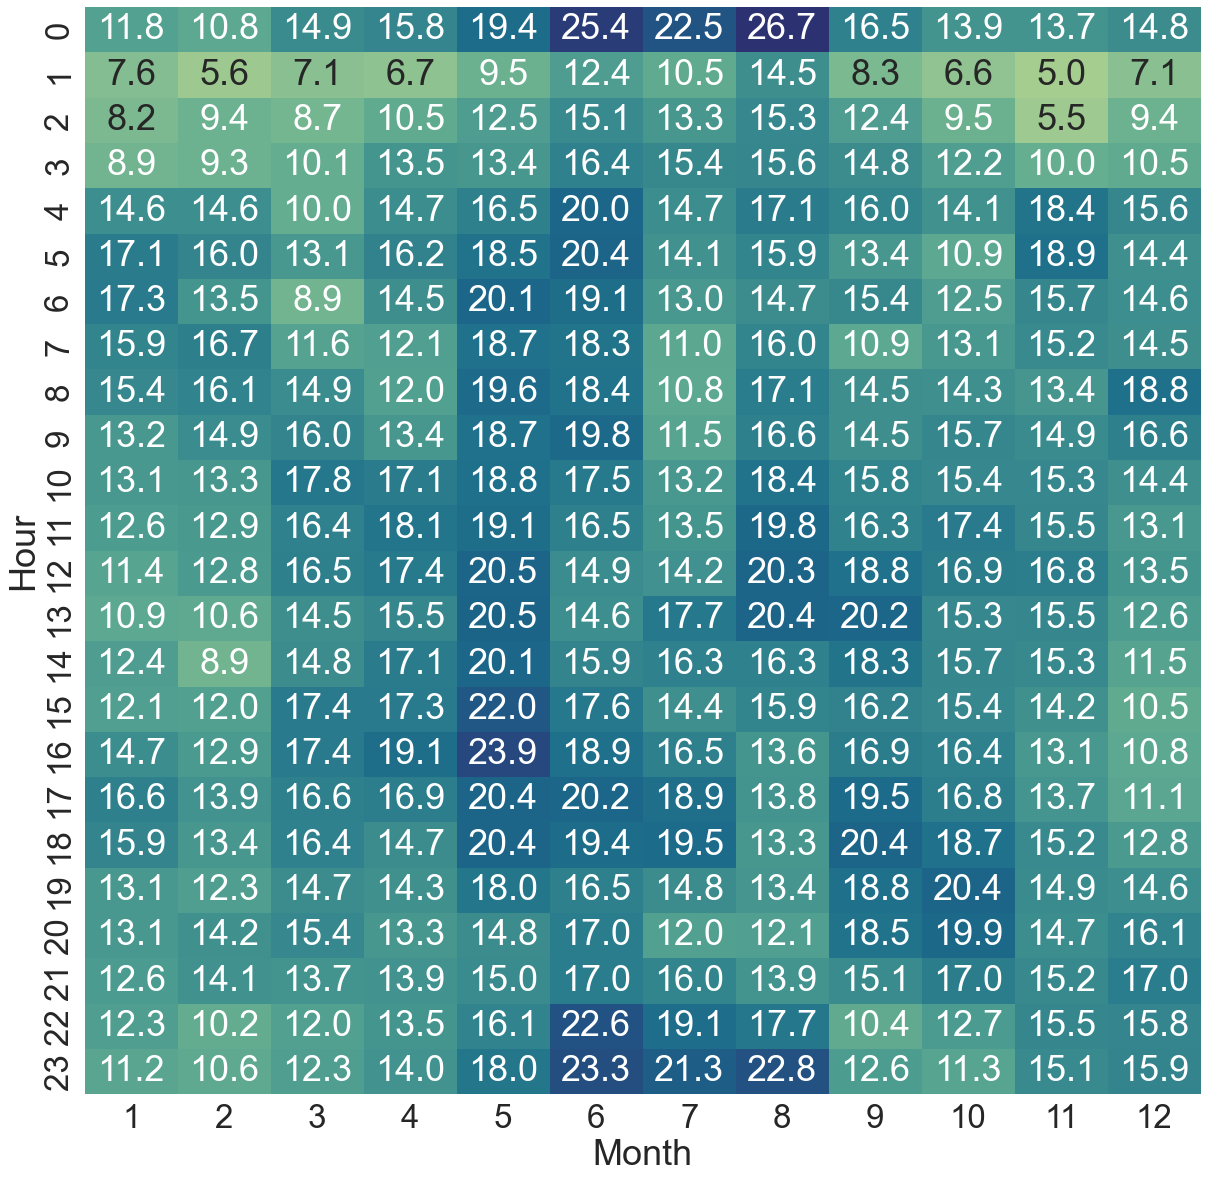

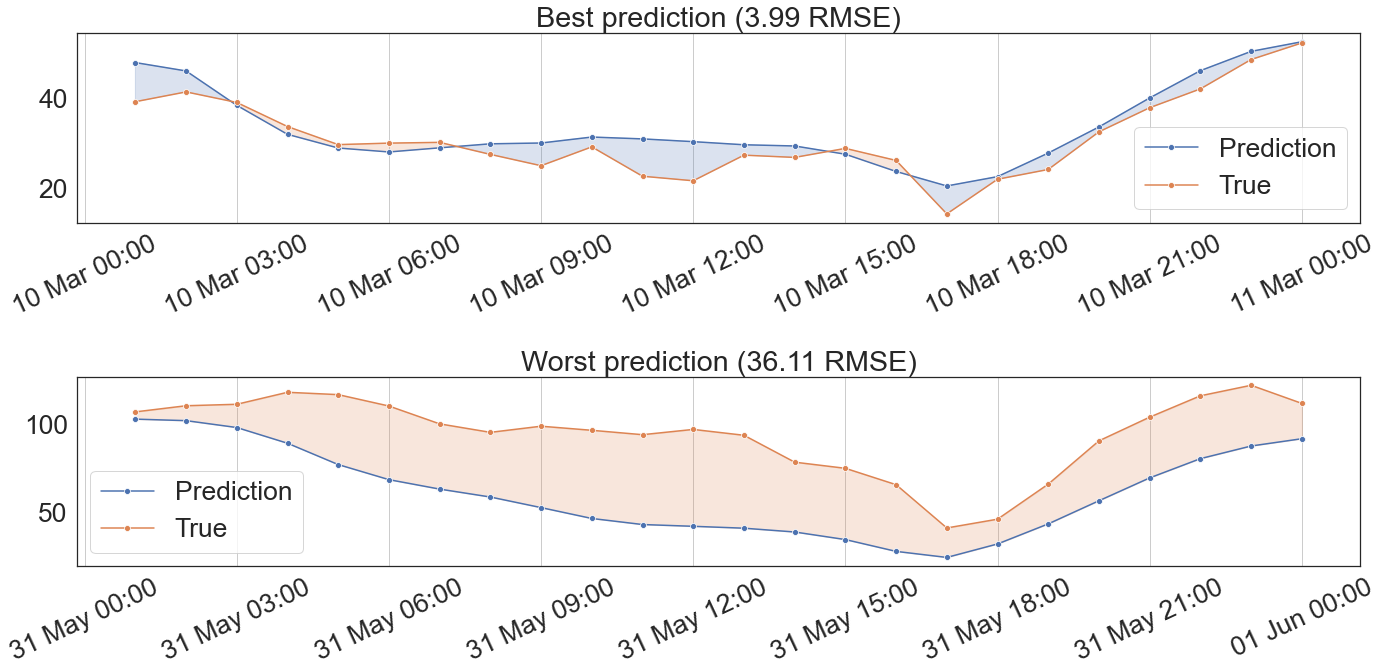

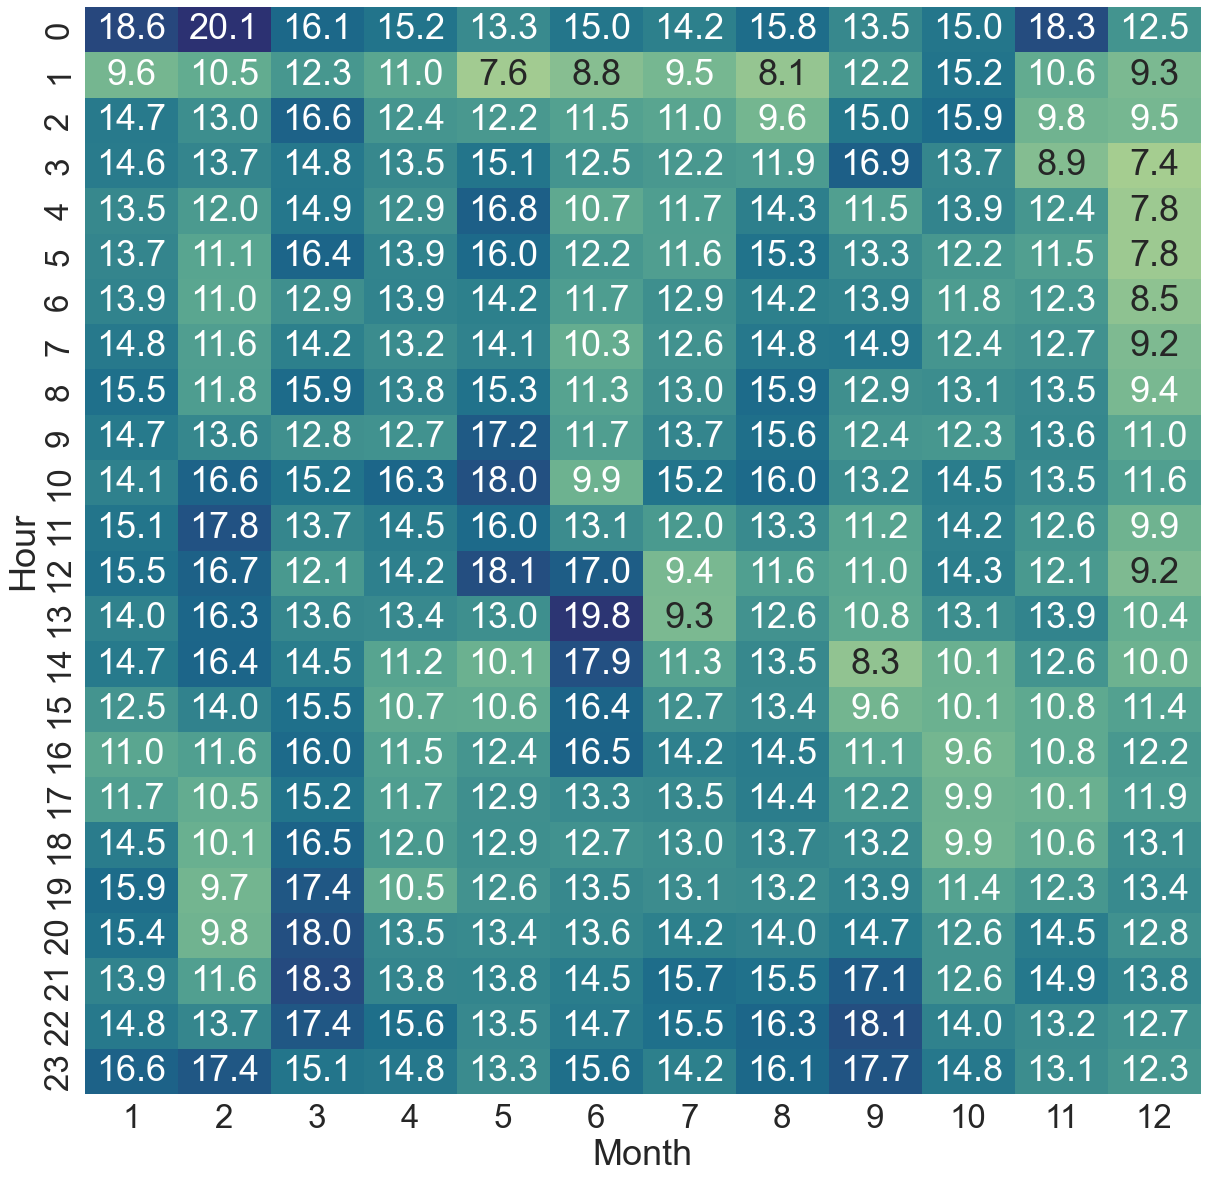

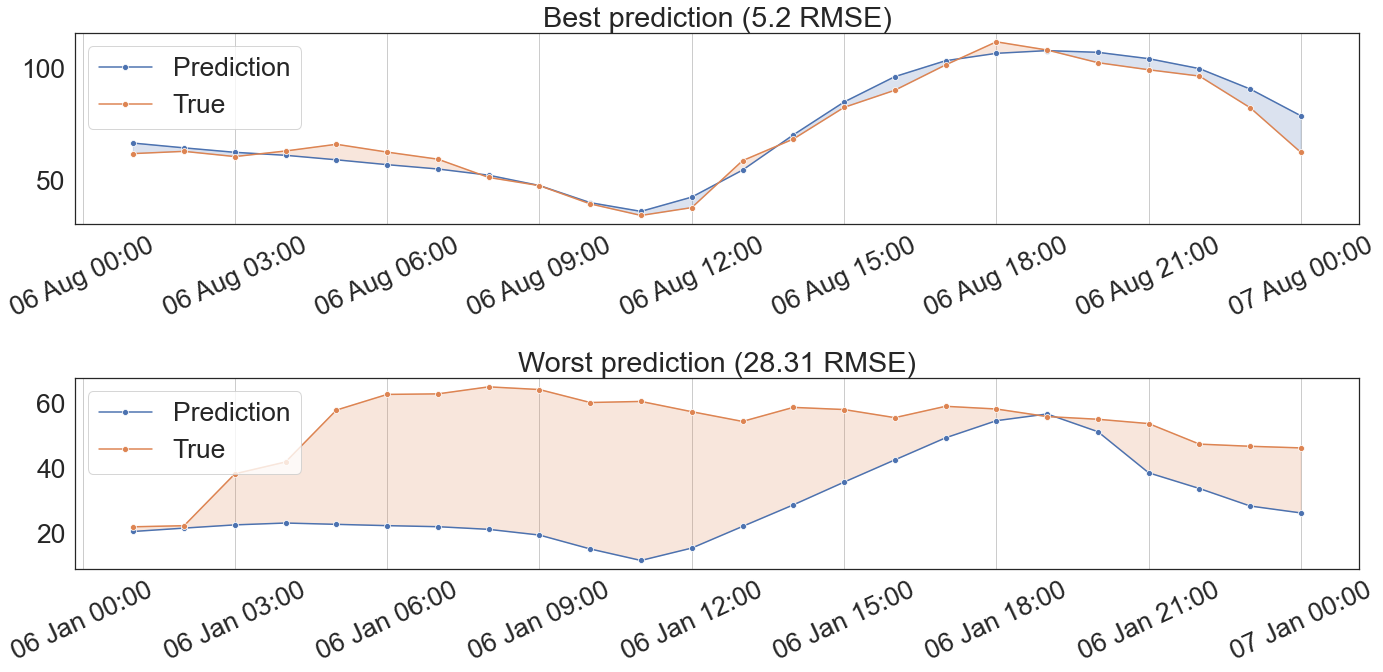

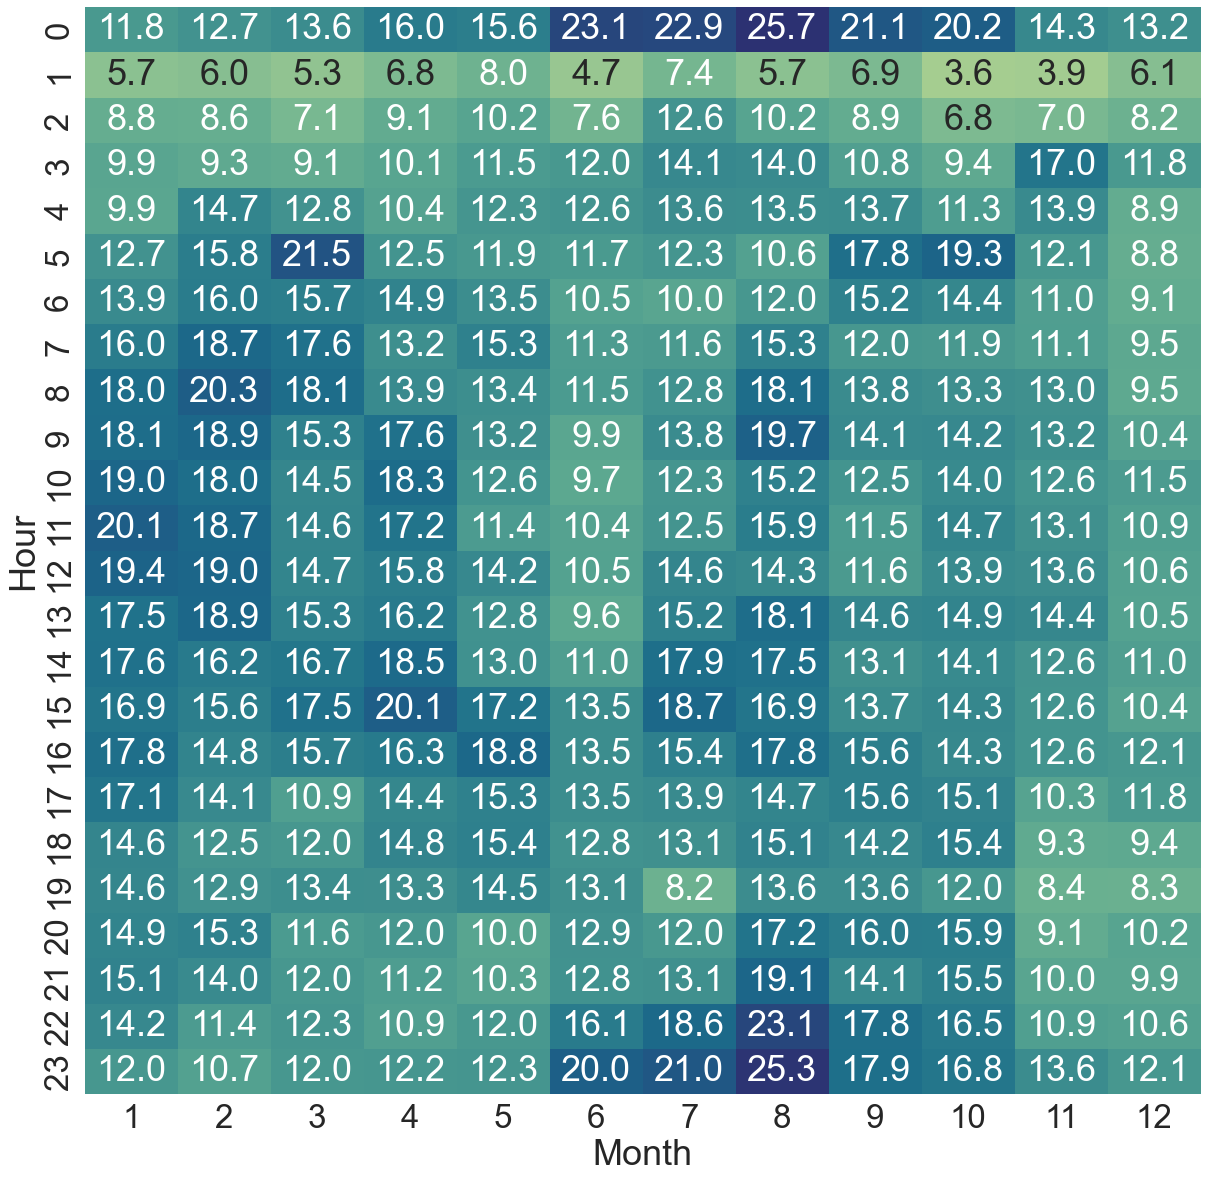

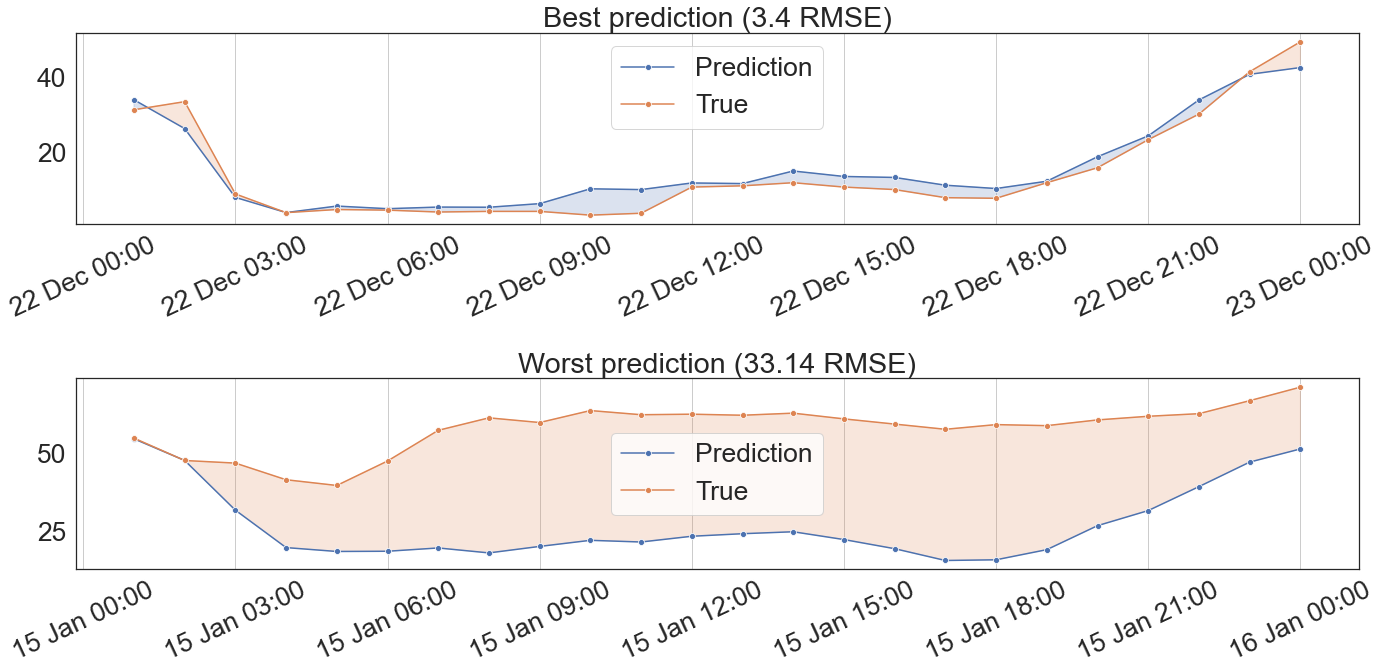

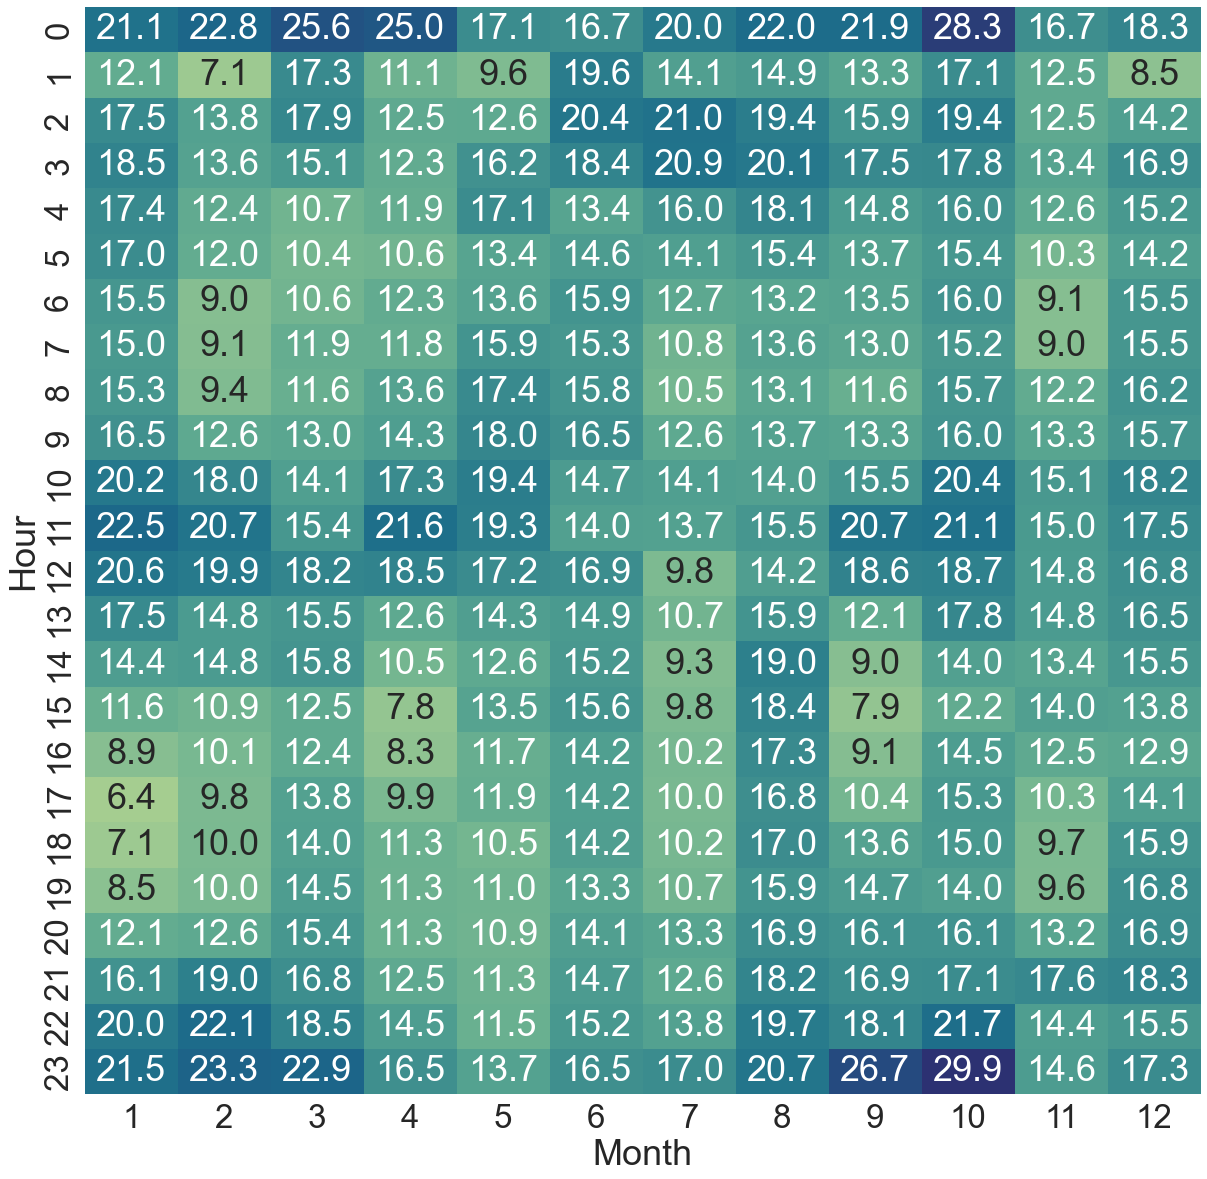

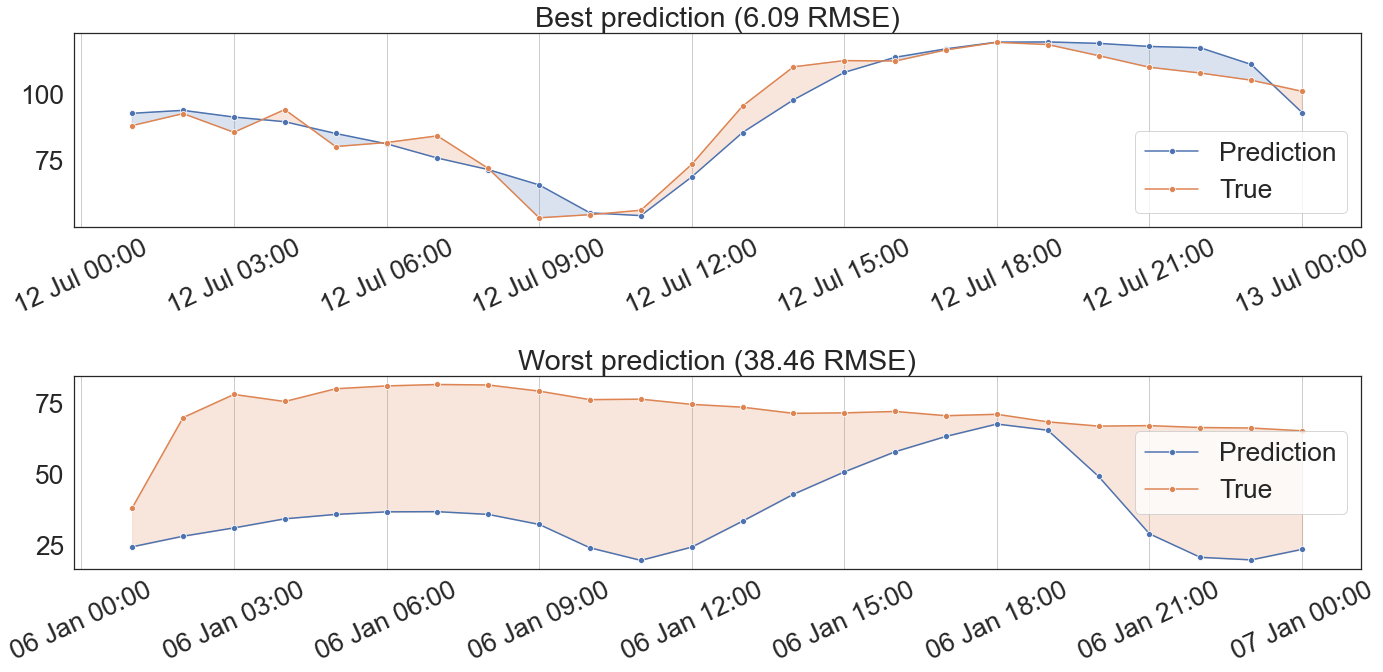

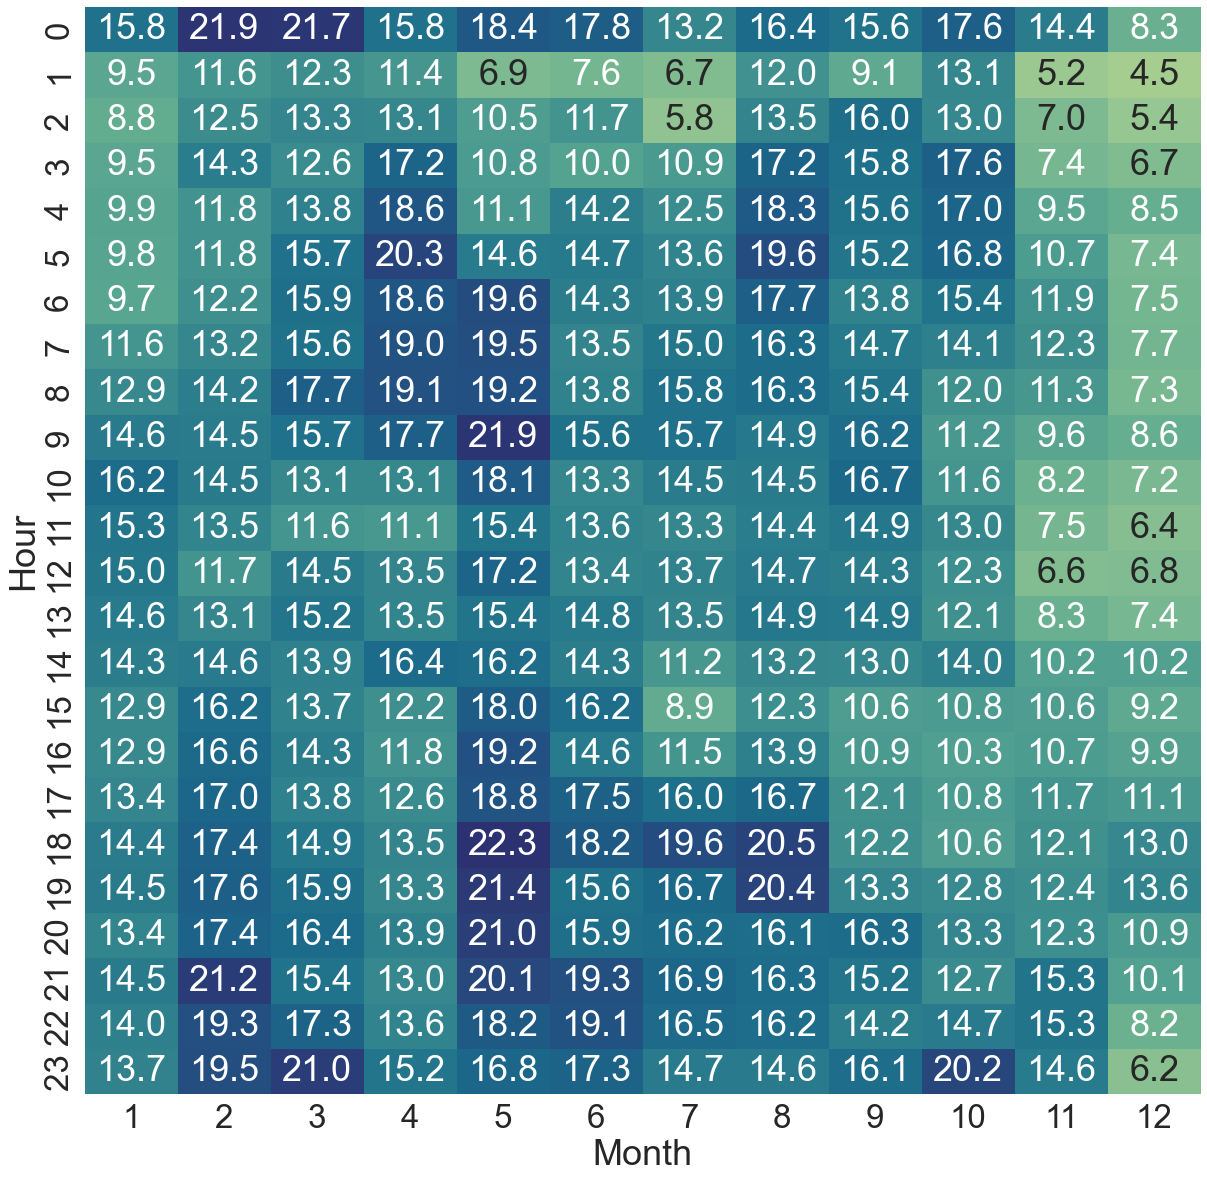

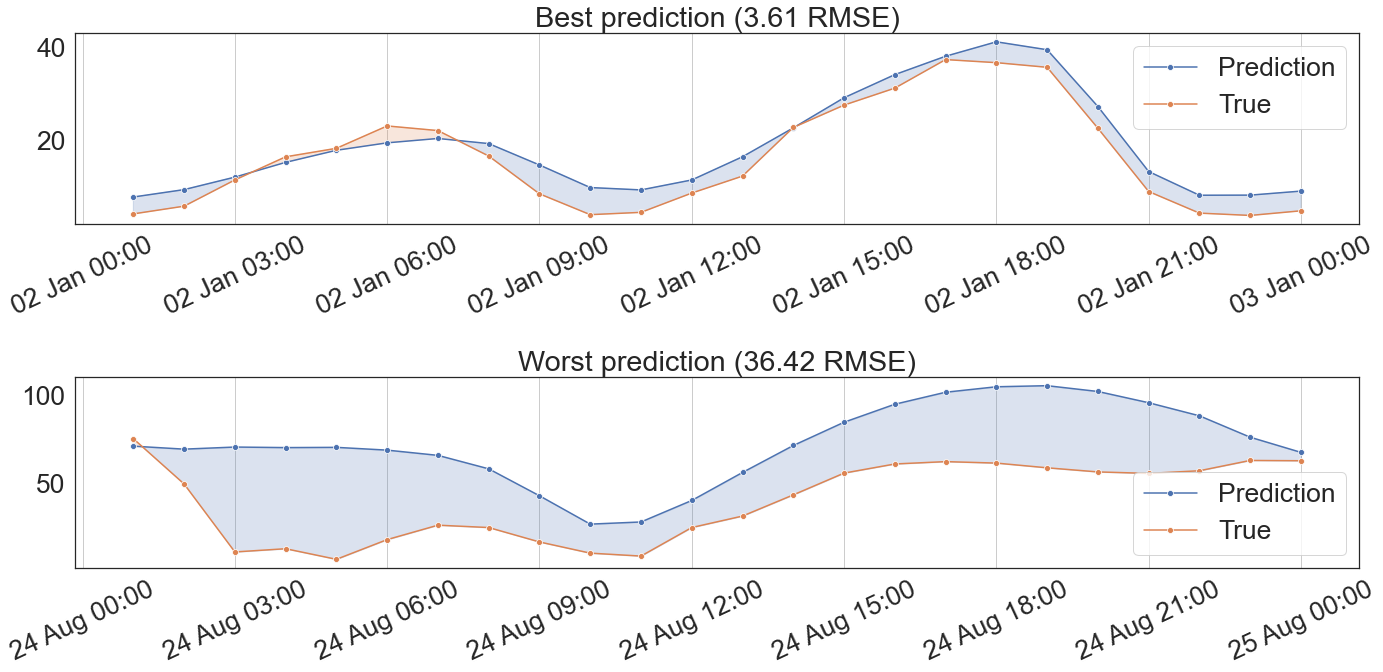

In [6]:
for dataset, config in parameters.items():
    seed = 123
    tf.random.set_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    experiment = ExperimentInstance(parameters[dataset])
    experiment.run()

    dates, inputs, true, preds = experiment.raw_results_[-1]
    
    with open(f'results/OzoneCrossVal/predictions/{dataset}_true.npy', 'wb') as f:
        np.save(f, true)

    with open(f'results/OzoneCrossVal/predictions/{dataset}_preds.npy', 'wb') as f:
        np.save(f, preds)

    plot_heatmap(dataset, true, preds, dates)

    plot_best_worst(dataset, true, preds, dates)

## Error maps

In [29]:
dataset = 'asomadilla'
"""with open(f'results/OzoneCrossVal/predictions/{dataset}_true.npy', 'wb') as f:
    np.save(f, true)

with open(f'results/OzoneCrossVal/predictions/{dataset}_preds.npy', 'wb') as f:
    np.save(f, preds)"""

dates = pd.date_range(datetime(2015, 1, 1) + timedelta(hours=24+1), datetime(2016, 1, 1), freq='H')
dates = dates[:len(true)]

mse = (true-preds)**2
results = pd.DataFrame({'Month': dates.month, 'Hour': dates.hour, 'Error': mse}).iloc[:-1].groupby(['Month', 'Hour']).mean().reset_index()
heatmap = results.pivot("Hour", "Month", "Error").apply(np.sqrt)

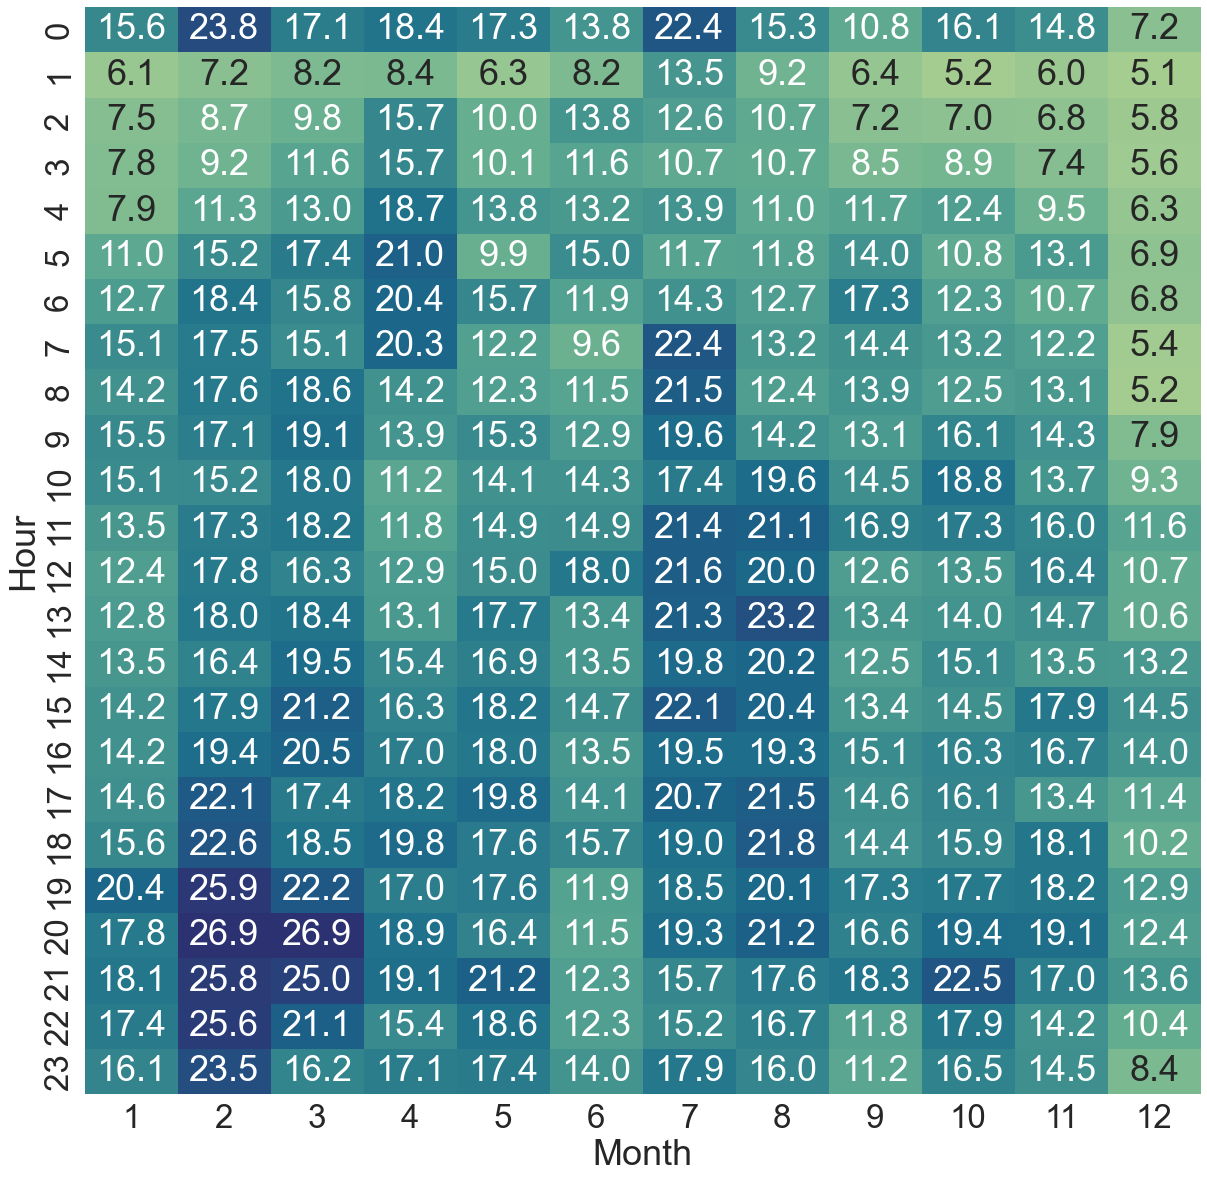

In [30]:
sns.set(font_scale=3)
plt.subplots(figsize=(20,20))
g = sns.heatmap(heatmap, annot=True, cmap="crest", fmt=".1f", cbar=False)
fig = g.get_figure()
fig.savefig(f"figures/ErrorMaps/{dataset.capitalize()}TSL.png", bbox_inches='tight') 

## Best/Worst predictions

In [7]:
preds = preds.reshape(-1, 24)
true = true.reshape(-1, 24)
mse_reshaped = np.sqrt(((true-preds)**2).mean(axis=1))
min_index = np.argmin(mse_reshaped)
best_dates = dates[min_index*24: min_index*24+24]
best_preds = preds[min_index]
best_trues = true[min_index]

max_index = np.argmax(mse_reshaped)

worst_dates = dates[max_index*24: max_index*24+24]
worst_preds = preds[max_index]
worst_trues = true[max_index]

In [8]:
sns.set(style='white', font_scale=2.4)
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.lineplot(x=best_dates, y=best_preds, ax=ax[0], label='Prediction', marker='o')
sns.lineplot(x=best_dates, y=best_trues, ax=ax[0], label='True', marker='o')
ax[0].xaxis.grid() # vertical lines
ax[0].set_title(f'Best prediction ({round(mse_reshaped[min_index], 2)} RMSE)')
ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds > best_trues), color='C0', alpha=0.2, interpolate=True)
ax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds <= best_trues), color='C1', alpha=0.2, interpolate=True)


sns.lineplot(x=worst_dates, y=worst_preds, ax=ax[1], label='Prediction', marker='o')
sns.lineplot(x=worst_dates, y=worst_trues, ax=ax[1], label='True', marker='o')
ax[1].xaxis.grid() # vertical lines
ax[1].set_title(f'Worst prediction ({round(mse_reshaped[max_index], 2)} RMSE)')
ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds <= worst_trues), color='C1', alpha=0.2, interpolate=True)
ax[1].fill_between(worst_dates, worst_preds, worst_trues, where=(worst_preds > worst_trues), color='C0', alpha=0.2, interpolate=True)


date_form = DateFormatter("%d %b %H:00")
ax[0].xaxis.set_major_formatter(date_form)

ax[1].xaxis.set_major_formatter(date_form)


for label in ax[0].get_xticklabels():
    label.set_ha("center")
    label.set_rotation(25)

for label in ax[1].get_xticklabels():
    label.set_ha("center")
    label.set_rotation(25)

plt.tight_layout()

fig.savefig(f"figures/BestWorst/BestWorst{dataset.capitalize()}TSL.png", bbox_inches='tight')

'sns.set(style=\'white\', font_scale=2.4)\nfig, ax = plt.subplots(2, 1, figsize=(20,10))\nsns.lineplot(x=best_dates, y=best_preds, ax=ax[0], label=\'Prediction\', marker=\'o\')\nsns.lineplot(x=best_dates, y=best_trues, ax=ax[0], label=\'True\', marker=\'o\')\nax[0].xaxis.grid() # vertical lines\nax[0].set_title(f\'Best prediction ({round(mse_reshaped[min_index], 2)} RMSE)\')\nax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds > best_trues), color=\'C0\', alpha=0.2, interpolate=True)\nax[0].fill_between(best_dates, best_preds, best_trues, where=(best_preds <= best_trues), color=\'C1\', alpha=0.2, interpolate=True)\n\n\nsns.lineplot(x=worst_dates, y=worst_preds, ax=ax[1], label=\'Prediction\', marker=\'o\')\nsns.lineplot(x=worst_dates, y=worst_trues, ax=ax[1], label=\'True\', marker=\'o\')\nax[1].xaxis.grid() # vertical lines\nax[1].set_title(f\'Worst prediction ({round(mse_reshaped[max_index], 2)} RMSE)\')\nax[1].fill_between(worst_dates, worst_preds, worst_trues, 